In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import geocoder
import json
import urllib
import urllib.request
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
import dice_ml
from dice_ml.utils import helpers 
import lime
import lime.lime_tabular
import codecs, json 
import tensorflow as tf
import keras.metrics
import shap
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,auc
import keras.backend as K
import keras
from keras.layers import Dense,BatchNormalization
from imblearn.over_sampling import SMOTE


In [2]:
df_trip = pd.read_csv('trippub.csv', error_bad_lines=False)
df_hh = pd.read_csv('hhpub.csv', error_bad_lines=False)
df_per = pd.read_csv('perpub.csv', error_bad_lines=False)
df_veh = pd.read_csv('vehpub.csv', error_bad_lines=False)

In [3]:
col_trip_all = [
    'DBHTNRNT', \
    'DBHUR', \
    'DBPPOPDN', \
    'DBRESDN', \
    'DTEEMPDN', \
    'DTHTNRNT', \
    'DTPPOPDN', \
    'DTRESDN', \
    'EDUC', \
    'GASPRICE', \
    'HHFAMINC', \
    'HHSIZE', \
    'HHSTATE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_ONTD', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'LIF_CYC', \
    'LOOP_TRIP', \
    'NONHHCNT', \
    'NUMADLT', \
    'NUMONTRP', \
    'OBHTNRNT', \
    'OBHUR', \
    'OBPPOPDN', \
    'OBRESDN', \
    'OTEEMPDN', \
    'OTHTNRNT', \
    'OTPPOPDN', \
    'OTRESDN', \
    'PERSONID', \
    'PRMACT', \
    'R_AGE', \
    'R_AGE_IMP', \
    'R_SEX', \
    'R_SEX_IMP', \
    'STRTTIME', \
    'TDAYDATE', \
    'TDWKND', \
    'TRAVDAY', \
    'TRIPPURP', \
    'TRPACCMP', \
    'TRPHHACC', \
    'TRPTRANS', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'WHYTRP1S', \
    'WORKER', \
    'WRKCOUNT', \
    'WTTRDFIN'
]

In [4]:
col_veh_all = [
    'ANNMILES', \
    'BESTMILE', \
    'BEST_EDT', \
    'BEST_FLG', \
    'BEST_OUT', \
    'FEGEMPG', \
    'FEGEMPGA', \
    'FEGEMPGF', \
    'FUELTYPE', \
    'GSCOST', \
    'GSTOTCST', \
    'GSYRGAL', \
    'HBHTNRNT', \
    'HBHUR', \
    'HBPPOPDN', \
    'HBRESDN', \
    'HFUEL', \
    'HHFAMINC', \
    'HHSIZE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'HTEEMPDN', \
    'HTHTNRNT', \
    'HTPPOPDN', \
    'HTRESDN', \
    'HYBRID', \
    'LIF_CYC', \
    'MAKE', \
    'MODEL', \
    'NUMADLT', \
    'OD_READ', \
    'PERSONID', \
    'TDAYDATE', \
    'TRAVDAY', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'VEHAGE', \
    'VEHOWNED', \
    'VEHOWNMO', \
    'VEHYEAR', \
    'WHOMAIN', \
    'WRKCOUNT', \
    'WTHHFIN'
]

In [5]:
col_per_all = [
    'ALT_16', \
    'ALT_23', \
    'ALT_45', \
    'BIKE4EX', \
    'BIKESHARE', \
    'BIKE_DFR', \
    'BIKE_GKP', \
    'BORNINUS', \
    'CARRODE', \
    'CARSHARE', \
    'CONDNIGH', \
    'CONDPUB', \
    'CONDRIDE', \
    'CONDRIVE', \
    'CONDSPEC', \
    'CONDTAX', \
    'CONDTRAV', \
    'DELIVER', \
    'DISTTOSC17', \
    'DISTTOWK17', \
    'EDUC', \
    'FLEXTIME', \
    'FRSTHM17', \
    'GCDWORK', \
    'GT1JBLWK', \
    'HBHTNRNT', \
    'HBHUR', \
    'HBPPOPDN', \
    'HBRESDN', \
    'HEALTH', \
    'HHFAMINC', \
    'HHSIZE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'HTEEMPDN', \
    'HTHTNRNT', \
    'HTPPOPDN', \
    'HTRESDN', \
    'LIF_CYC', \
    'LPACT', \
    'LSTTRDAY17', \
    'MCUSED', \
    'MEDCOND', \
    'MEDCOND6', \
    'NBIKETRP', \
    'NOCONG', \
    'NUMADLT', \
    'NWALKTRP', \
    'OCCAT', \
    'OUTCNTRY', \
    'OUTOFTWN', \
    'PAYPROF', \
    'PERSONID', \
    'PHYACT', \
    'PRMACT', \
    'PTUSED', \
    'PUBTIME', \
    'RIDESHARE', \
    'R_AGE', \
    'R_AGE_IMP', \
    'R_HISP', \
    'R_RACE', \
    'R_RELAT', \
    'R_SEX', \
    'R_SEX_IMP', \
    'SAMEPLC', \
    'SCHTYP', \
    'TDAYDATE', \
    'TIMETOWK', \
    'TRAVDAY', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'VPACT', \
    'WALK4EX', \
    'WALK_DEF', \
    'WALK_GKQ', \
    'WKFMHMXX', \
    'WKFTPT', \
    'WKRMHM', \
    'WORKER', \
    'WRKCOUNT', \
    'WRK_HOME', \
    'WTPERFIN', \
    'W_CANE', \
    'W_CHAIR', \
    'W_CRUTCH', \
    'W_DOG', \
    'W_MTRCHR', \
    'W_NONE', \
    'W_SCOOTR', \
    'W_WHCANE', \
    'W_WLKR', \
    'YEARMILE', \
    'YRTOUS'
]

In [6]:
col_hh_all = [
    'BIKE', \
    'BIKE2SAVE', \
    'BUS', \
    'CAR', \
    'HBHTNRNT', \
    'HBHUR', \
    'HBPPOPDN', \
    'HBRESDN', \
    'HHFAMINC', \
    'HHRELATD', \
    'HHSIZE', \
    'HHVEHCNT', \
    'HH_HISP', \
    'HH_RACE', \
    'HOMEOWN', \
    'HOUSEID', \
    'HTEEMPDN', \
    'HTHTNRNT', \
    'HTPPOPDN', \
    'HTRESDN', \
    'LIF_CYC', \
    'NUMADLT', \
    'PARA', \
    'PC', \
    'PLACE', \
    'PRICE', \
    'PTRANS', \
    'SPHONE', \
    'TAB', \
    'TAXI', \
    'TDAYDATE', \
    'TRAIN', \
    'TRAVDAY', \
    'URBAN', \
    'URBANSIZE', \
    'URBRUR', \
    'WALK', \
    'WALK2SAVE', \
    'WEBUSE17', \
    'WRKCOUNT', \
    'WTHHFIN', \
    'YOUNGCHILD'
]

In [7]:
col_trip = col_trip_all # trip
col_hh = [i for i in col_hh_all if i not in col_trip] # household - trip
col_per = [i for i in col_per_all if i not in col_trip + col_hh] # person - trip - household
col_veh = [i for i in col_veh_all if i not in col_trip + col_hh + col_per]

In [8]:
col_hh.append('HOUSEID')
col_per.extend(['HOUSEID', 'PERSONID'])

In [9]:
df_trip_stg = df_trip[col_trip]
df_hh_stg = df_hh[col_hh]
df_per_stg = df_per[col_per]
df_veh_stg = df_veh[col_veh]

In [10]:
df_trip_hh = pd.merge(df_trip_stg, df_hh_stg, how='left', left_on='HOUSEID', right_on='HOUSEID')

In [11]:
df_merge_stg = pd.merge(df_trip_hh, df_per_stg, how='left', left_on=['HOUSEID', 'PERSONID'], right_on=['HOUSEID', 'PERSONID'])

In [12]:
df_merge_stg.head()

,DBHTNRNT,DBHUR,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,EDUC,GASPRICE,...,W_CHAIR,W_CRUTCH,W_DOG,W_MTRCHR,W_NONE,W_SCOOTR,W_WHCANE,W_WLKR,YEARMILE,YRTOUS
0,30,T,300,300,350,50,750,300,3,228.4,...,-1,-1,-1,-1,-1,-1,-1,-1,1000,-1
1,20,T,750,300,750,50,1500,750,3,228.4,...,-1,-1,-1,-1,-1,-1,-1,-1,1000,-1
2,20,T,750,300,750,50,1500,750,3,228.4,...,-1,-1,-1,-1,-1,-1,-1,-1,10000,-1
3,40,S,1500,750,750,40,1500,750,3,228.4,...,-1,-1,-1,-1,-1,-1,-1,-1,10000,-1
4,60,T,750,300,350,50,750,300,2,228.4,...,-1,-1,-1,-1,-1,-1,-1,-1,1000,-1


In [13]:
col_cat = []
for col in df_merge_stg.columns:
    try:
        _ = df_merge_stg[col].astype(float)
    except ValueError:
        if col != 'HHSTATE':
            print('Couldn\'t covert %s to float' % col)
            col_cat.append(col)
            pass

Couldn't covert DBHUR to float
Couldn't covert OBHUR to float
Couldn't covert TRIPPURP to float
Couldn't covert HBHUR to float


In [14]:
df_merge_stg = pd.get_dummies(df_merge_stg, columns=col_cat)


In [15]:
modes_ny=df_merge_stg[df_merge_stg['HHSTATE']=='NY']

modes_ny

,DBHTNRNT,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,EDUC,GASPRICE,HHFAMINC,...,TRIPPURP_HBSHOP,TRIPPURP_HBSOCREC,TRIPPURP_HBW,TRIPPURP_NHB,HBHUR_-9,HBHUR_C,HBHUR_R,HBHUR_S,HBHUR_T,HBHUR_U
8,5,750,300,350,30,750,300,5,233.8,10,...,0,1,0,0,0,1,0,0,0,0
9,60,17000,7000,5000,80,17000,17000,5,233.8,10,...,0,1,0,0,0,1,0,0,0,0
10,90,3000,1500,5000,70,17000,7000,5,233.8,10,...,0,1,0,0,0,1,0,0,0,0
11,60,17000,7000,5000,80,17000,17000,5,233.8,10,...,0,1,0,0,0,1,0,0,0,0
12,20,3000,1500,750,20,1500,750,5,233.8,10,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,70,7000,7000,5000,50,7000,3000,2,253.8,8,...,0,0,0,0,0,0,1,0,0,0
923368,30,300,300,750,20,1500,300,2,253.8,8,...,0,0,0,1,0,0,1,0,0,0
923369,5,50,50,25,5,50,50,2,253.8,8,...,1,0,0,0,0,0,1,0,0,0
923530,-9,-9,-9,-9,-9,-9,-9,2,255.8,2,...,1,0,0,0,1,0,0,0,0,0


In [16]:
modes_ny['TARGET']=0
for index,row in modes_ny.iterrows():
    if row['TRPTRANS'] in (1,2,11, 15, 16):
        modes_ny['TARGET'][index]= 1
    else:
        modes_ny['TARGET'][index]= 0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
modes_ny=modes_ny.drop(['HOUSEID','HHSTATE'], axis=1)


In [ ]:
df_merge['TARGET'].value_counts()


In [592]:
modes=pd.read_csv('trippub.csv', error_bad_lines=False)

In [635]:
modes['TRPTRANS'].unique()

array([ 3,  6,  4,  1,  5, 97, 11,  2, 17, 16, 15, 10, 19,  8,  9, 18, 12,
       13, 20,  7, 14, -8, -7, -9], dtype=int64)

In [636]:
modes['HHSTATE'].unique()

array(['NC', 'WI', 'NY', 'MD', 'PA', 'CA', 'TX', 'ME', 'AZ', 'WA', 'AL',
       'IL', 'KY', 'MT', 'IA', 'GA', 'VA', 'SC', 'WV', 'FL', 'NH', 'MN',
       'NE', 'AR', 'NJ', 'SD', 'NM', 'OK', 'MI', 'VT', 'ID', 'DE', 'TN',
       'MA', 'WY', 'CO', 'IN', 'HI', 'AK', 'OH', 'RI', 'LA', 'ND', 'OR',
       'KS', 'UT', 'MO', 'DC', 'NV', 'MS', 'CT'], dtype=object)

In [639]:
modes_ny=modes[modes['HHSTATE']=='NY']
modes_ny

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
8,30000012,1,1,550,605,15,3.395,4,0,0,...,60,17000,7000,30,750,300,350,5,750,300
9,30000012,1,2,700,715,15,3.395,4,0,0,...,5,750,300,80,17000,17000,5000,60,17000,7000
10,30000012,1,3,730,740,10,1.059,4,0,0,...,60,17000,7000,70,17000,7000,5000,90,3000,1500
11,30000012,1,4,805,815,10,1.014,4,0,0,...,90,3000,1500,80,17000,17000,5000,60,17000,7000
12,30000012,1,5,900,920,20,4.291,3,0,0,...,60,17000,7000,20,1500,750,750,20,3000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,40794020,2,3,900,1000,60,22.182,3,0,0,...,5,50,50,50,7000,3000,5000,70,7000,7000
923368,40794020,2,4,1200,1240,40,5.302,3,0,0,...,70,7000,7000,20,1500,300,750,30,300,300
923369,40794020,2,5,1330,1350,20,15.239,3,0,0,...,30,300,300,5,50,50,25,5,50,50
923530,40794249,1,1,1430,1447,17,4.914,3,1,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [640]:
#modes_ny=modes_ny[modes_ny['TRPTRANS']!=97]
modes_ny

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
8,30000012,1,1,550,605,15,3.395,4,0,0,...,60,17000,7000,30,750,300,350,5,750,300
9,30000012,1,2,700,715,15,3.395,4,0,0,...,5,750,300,80,17000,17000,5000,60,17000,7000
10,30000012,1,3,730,740,10,1.059,4,0,0,...,60,17000,7000,70,17000,7000,5000,90,3000,1500
11,30000012,1,4,805,815,10,1.014,4,0,0,...,90,3000,1500,80,17000,17000,5000,60,17000,7000
12,30000012,1,5,900,920,20,4.291,3,0,0,...,60,17000,7000,20,1500,750,750,20,3000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,40794020,2,3,900,1000,60,22.182,3,0,0,...,5,50,50,50,7000,3000,5000,70,7000,7000
923368,40794020,2,4,1200,1240,40,5.302,3,0,0,...,70,7000,7000,20,1500,300,750,30,300,300
923369,40794020,2,5,1330,1350,20,15.239,3,0,0,...,30,300,300,5,50,50,25,5,50,50
923530,40794249,1,1,1430,1447,17,4.914,3,1,0,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [18]:
modes_ny=modes_ny.drop(['HOUSEID','DRVR_FLG','HHSTATE','PERSONID','TDTRPNUM','VEHID','VEHTYPE','TRACC_WLK','TRACC_POV','TRACC_BUS','TRACC_CRL','TRACC_SUB','TRACC_OTH','TREGR_WLK','TREGR_BUS','TREGR_POV','TREGR_CRL','TREGR_SUB','TREGR_OTH'], axis=1)
#modes_ny=modes_ny.loc[(modes_ny['TRPTRANS']!=97)&(modes_ny['TRPTRANS']!=-9)&(modes_ny['TRPTRANS']!=-8)&(modes_ny['TRPTRANS']!=-7)]
modes_ny

KeyError: "['HOUSEID' 'DRVR_FLG' 'HHSTATE' 'TDTRPNUM' 'VEHID' 'VEHTYPE' 'TRACC_WLK'\n 'TRACC_POV' 'TRACC_BUS' 'TRACC_CRL' 'TRACC_SUB' 'TRACC_OTH' 'TREGR_WLK'\n 'TREGR_BUS' 'TREGR_POV' 'TREGR_CRL' 'TREGR_SUB' 'TREGR_OTH'] not found in axis"

In [598]:
modes_full=modes.drop(['HOUSEID','HHSTATE','PERSONID','TDTRPNUM','VEHID','VEHTYPE','TRACC_WLK','TRACC_POV','TRACC_BUS','TRACC_CRL','TRACC_SUB','TRACC_OTH','TREGR_WLK','TREGR_BUS','TREGR_POV','TREGR_CRL','TREGR_SUB','TREGR_OTH'], axis=1)
modes_full=modes_full.loc[(modes_full['TRPTRANS']!=97)&(modes_full['TRPTRANS']!=-9)&(modes_full['TRPTRANS']!=-8)&(modes_full['TRPTRANS']!=-7)]
modes_full

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,1000,1015,15,5.244,3,0,0,-1,-1,-1,...,20,750,300,50,750,300,350,30,300,300
1,1510,1530,20,5.149,3,0,0,-1,-1,-1,...,30,300,300,50,1500,750,750,20,750,300
2,700,900,120,84.004,6,0,0,-1,-1,-1,...,40,1500,750,50,1500,750,750,20,750,300
3,1800,2030,150,81.628,6,0,0,-1,-1,-1,...,20,750,300,40,1500,750,750,40,1500,750
4,845,900,15,2.250,3,0,0,-1,-1,-1,...,20,750,300,50,750,300,350,60,750,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923567,810,837,27,1.168,1,0,0,-1,-1,-1,...,70,30000,17000,70,7000,7000,5000,80,17000,17000
923568,1320,1328,8,0.238,1,0,0,-1,-1,-1,...,80,17000,17000,70,7000,7000,5000,60,3000,3000
923569,1415,1420,5,0.238,1,0,0,-1,-1,-1,...,60,3000,3000,70,7000,7000,5000,80,17000,17000
923570,1820,1845,25,0.867,1,0,0,-1,-1,-1,...,80,17000,17000,60,30000,30000,5000,70,30000,30000


In [13]:
modes_full['TARGET']=0
for index,row in modes_ny.iterrows():
    if row['TRPTRANS'] in (1, 2):
        modes_full['TARGET'][index]= 0 # soft mode (walk or bicycle)
    elif row['TRPTRANS'] in (3, 4, 5, 6, 7, 8, 9, 18):
        modes_full['TARGET'][index]= 1 # car
    elif row['TRPTRANS'] in (11, 15, 16):
        modes_full['TARGET'][index]= 2 # public transit
    else:
        modes_full['TARGET'][index]= 3 

modes_full

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kshit\ana

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,...,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,TARGET
0,1000,1015,15,5.244,3,0,0,-1,-1,-1,...,750,300,50,750,300,350,30,300,300,0
1,1510,1530,20,5.149,3,0,0,-1,-1,-1,...,300,300,50,1500,750,750,20,750,300,0
2,700,900,120,84.004,6,0,0,-1,-1,-1,...,1500,750,50,1500,750,750,20,750,300,0
3,1800,2030,150,81.628,6,0,0,-1,-1,-1,...,750,300,40,1500,750,750,40,1500,750,0
4,845,900,15,2.250,3,0,0,-1,-1,-1,...,750,300,50,750,300,350,60,750,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923567,810,837,27,1.168,1,0,0,-1,-1,-1,...,30000,17000,70,7000,7000,5000,80,17000,17000,0
923568,1320,1328,8,0.238,1,0,0,-1,-1,-1,...,17000,17000,70,7000,7000,5000,60,3000,3000,0
923569,1415,1420,5,0.238,1,0,0,-1,-1,-1,...,3000,3000,70,7000,7000,5000,80,17000,17000,0
923570,1820,1845,25,0.867,1,0,0,-1,-1,-1,...,17000,17000,60,30000,30000,5000,70,30000,30000,0


In [19]:
modes_ny

,DBHTNRNT,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,EDUC,GASPRICE,HHFAMINC,...,TRIPPURP_HBSOCREC,TRIPPURP_HBW,TRIPPURP_NHB,HBHUR_-9,HBHUR_C,HBHUR_R,HBHUR_S,HBHUR_T,HBHUR_U,TARGET
8,5,750,300,350,30,750,300,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
9,60,17000,7000,5000,80,17000,17000,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
10,90,3000,1500,5000,70,17000,7000,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
11,60,17000,7000,5000,80,17000,17000,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
12,20,3000,1500,750,20,1500,750,5,233.8,10,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,70,7000,7000,5000,50,7000,3000,2,253.8,8,...,0,0,0,0,0,1,0,0,0,0
923368,30,300,300,750,20,1500,300,2,253.8,8,...,0,0,1,0,0,1,0,0,0,0
923369,5,50,50,25,5,50,50,2,253.8,8,...,0,0,0,0,0,1,0,0,0,0
923530,-9,-9,-9,-9,-9,-9,-9,2,255.8,2,...,0,0,0,1,0,0,0,0,0,0


In [642]:
modes_ny['TARGET']=0
for index,row in modes_ny.iterrows():
    if row['TRPTRANS'] in (11, 15, 16):
        modes_ny['TARGET'][index]= 1
    else:
        modes_ny['TARGET'][index]= 0
        
modes_ny


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,...,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,TARGET
8,550,605,15,3.395,4,0,0,-1,-1,-1,...,17000,7000,30,750,300,350,5,750,300,0
9,700,715,15,3.395,4,0,0,-1,-1,-1,...,750,300,80,17000,17000,5000,60,17000,7000,0
10,730,740,10,1.059,4,0,0,-1,-1,-1,...,17000,7000,70,17000,7000,5000,90,3000,1500,0
11,805,815,10,1.014,4,0,0,-1,-1,-1,...,3000,1500,80,17000,17000,5000,60,17000,7000,0
12,900,920,20,4.291,3,0,0,-1,-1,-1,...,17000,7000,20,1500,750,750,20,3000,1500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,900,1000,60,22.182,3,0,0,-1,-1,-1,...,50,50,50,7000,3000,5000,70,7000,7000,0
923368,1200,1240,40,5.302,3,0,0,-1,-1,-1,...,7000,7000,20,1500,300,750,30,300,300,0
923369,1330,1350,20,15.239,3,0,0,-1,-1,-1,...,300,300,5,50,50,25,5,50,50,0
923530,1430,1447,17,4.914,3,1,0,-1,-1,-1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,0


In [643]:
modes_ny['TARGET'].unique()

array([0, 1], dtype=int64)

In [599]:
modes_ny['TARGET']=0
for index,row in modes_ny.iterrows():
    if row['TRPTRANS'] in (1, 2):
        modes_ny['TARGET'][index]= 0 # soft mode (walk or bicycle)
    elif row['TRPTRANS'] in (3, 4, 5, 6, 7, 8, 9, 18):
        modes_ny['TARGET'][index]= 1 # car
    elif row['TRPTRANS'] in (11, 15, 16):
        modes_ny['TARGET'][index]= 2 # public transit
    else:
        modes_ny['TARGET'][index]= 3 

modes_ny


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,...,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,TARGET
8,550,605,15,3.395,4,0,0,-1,-1,-1,...,17000,7000,30,750,300,350,5,750,300,1
9,700,715,15,3.395,4,0,0,-1,-1,-1,...,750,300,80,17000,17000,5000,60,17000,7000,1
10,730,740,10,1.059,4,0,0,-1,-1,-1,...,17000,7000,70,17000,7000,5000,90,3000,1500,1
11,805,815,10,1.014,4,0,0,-1,-1,-1,...,3000,1500,80,17000,17000,5000,60,17000,7000,1
12,900,920,20,4.291,3,0,0,-1,-1,-1,...,17000,7000,20,1500,750,750,20,3000,1500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,900,1000,60,22.182,3,0,0,-1,-1,-1,...,50,50,50,7000,3000,5000,70,7000,7000,1
923368,1200,1240,40,5.302,3,0,0,-1,-1,-1,...,7000,7000,20,1500,300,750,30,300,300,1
923369,1330,1350,20,15.239,3,0,0,-1,-1,-1,...,300,300,5,50,50,25,5,50,50,1
923530,1430,1447,17,4.914,3,1,0,-1,-1,-1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,1


In [644]:
len(modes_ny['TARGET'].unique())

2

In [20]:

#X=modes_ny.drop(['PSGR_FLG','TRPTRANS','PUBTRANS','WHODROVE','TRACCTM','TRWAITTM','NUMTRANS','TREGRTM','DROP_PRK','HHMEMDRV','TRPHHVEH'], axis=1)
X=modes_ny
cols_to_remove = []
for col in X.columns:
    try:
        _ = X[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass
    
X = X[[col for col in X.columns if col not in cols_to_remove]]
X

,DBHTNRNT,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,EDUC,GASPRICE,HHFAMINC,...,TRIPPURP_HBSOCREC,TRIPPURP_HBW,TRIPPURP_NHB,HBHUR_-9,HBHUR_C,HBHUR_R,HBHUR_S,HBHUR_T,HBHUR_U,TARGET
8,5,750,300,350,30,750,300,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
9,60,17000,7000,5000,80,17000,17000,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
10,90,3000,1500,5000,70,17000,7000,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
11,60,17000,7000,5000,80,17000,17000,5,233.8,10,...,1,0,0,0,1,0,0,0,0,0
12,20,3000,1500,750,20,1500,750,5,233.8,10,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,70,7000,7000,5000,50,7000,3000,2,253.8,8,...,0,0,0,0,0,1,0,0,0,0
923368,30,300,300,750,20,1500,300,2,253.8,8,...,0,0,1,0,0,1,0,0,0,0
923369,5,50,50,25,5,50,50,2,253.8,8,...,0,0,0,0,0,1,0,0,0,0
923530,-9,-9,-9,-9,-9,-9,-9,2,255.8,2,...,0,0,0,1,0,0,0,0,0,0


In [698]:
#Y=modes_full['TARGET']
X=modes_full.drop(['TRPMILES','TRPTRANS','TARGET'], axis=1)
cols_to_remove = []
for col in X.columns:
    try:
        _ = X[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass
    
X = X[[col for col in X.columns if col not in cols_to_remove]]
X

KeyError: 'TARGET'

In [21]:
X=X.drop(['PUBTRANS'])
X

KeyError: "['PUBTRANS'] not found in axis"

In [724]:
X1=X[X['TARGET']==1]
X2=X[X['TARGET']==0].sample(34000)

In [725]:
X3=pd.concat([X1,X2])
X3=X3.sample(frac=1)
X3

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,WHYFROM,LOOP_TRIP,HH_ONTD,NONHHCNT,...,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,TARGET
727367,533,556,23,7.331,0,0,1,2,1,0,...,7000,1500,40,7000,1500,1500,50,7000,1500,0
294561,840,905,25,4.704,0,0,14,2,1,0,...,750,300,20,300,300,150,40,750,300,0
326078,805,806,1,0.209,0,0,13,2,1,0,...,1500,750,70,3000,1500,750,80,1500,750,0
453893,1700,1845,105,19.171,0,0,3,2,1,0,...,30000,30000,60,17000,7000,5000,40,17000,7000,1
783857,940,1000,20,6.189,2,0,11,2,1,2,...,3000,1500,20,750,300,350,5,750,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,830,835,5,0.380,2,2,15,2,3,0,...,3000,1500,20,7000,1500,3000,20,3000,1500,0
535192,1714,1715,1,0.093,0,0,11,2,1,0,...,750,300,5,300,300,150,5,750,300,0
574922,1213,1220,7,2.552,4,4,6,2,5,0,...,7000,3000,40,3000,1500,1500,50,3000,1500,0
117845,1730,1750,20,7.729,2,2,13,2,3,0,...,300,300,5,300,300,150,5,750,300,0


In [726]:
Y=X3['TARGET']
X3=X3.drop(['TARGET'],axis=1)

In [22]:
Y=modes_ny['TARGET']

In [23]:
X['OBRESDN']

8         7000
9          300
10        7000
11        1500
12        7000
          ... 
923367      50
923368    7000
923369     300
923530      -9
923531      -9
Name: OBRESDN, Length: 120207, dtype: int64

In [24]:
X=X.dropna()
X = X.astype(float)
X

,DBHTNRNT,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,EDUC,GASPRICE,HHFAMINC,...,TRIPPURP_HBSOCREC,TRIPPURP_HBW,TRIPPURP_NHB,HBHUR_-9,HBHUR_C,HBHUR_R,HBHUR_S,HBHUR_T,HBHUR_U,TARGET
8,5.0,750.0,300.0,350.0,30.0,750.0,300.0,5.0,233.8,10.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,60.0,17000.0,7000.0,5000.0,80.0,17000.0,17000.0,5.0,233.8,10.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,90.0,3000.0,1500.0,5000.0,70.0,17000.0,7000.0,5.0,233.8,10.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,60.0,17000.0,7000.0,5000.0,80.0,17000.0,17000.0,5.0,233.8,10.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,20.0,3000.0,1500.0,750.0,20.0,1500.0,750.0,5.0,233.8,10.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,70.0,7000.0,7000.0,5000.0,50.0,7000.0,3000.0,2.0,253.8,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
923368,30.0,300.0,300.0,750.0,20.0,1500.0,300.0,2.0,253.8,8.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
923369,5.0,50.0,50.0,25.0,5.0,50.0,50.0,2.0,253.8,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
923530,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,2.0,255.8,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X=X.drop(['CARRODE'], axis=1)

KeyError: "['CARRODE'] not found in axis"

In [27]:

X=X.drop(['PTUSED'], axis=1)

In [28]:
X=X.drop(['PTRANS'], axis=1)

In [29]:
X=X.drop(['TARGET'], axis=1)

In [30]:
X=X.drop(['PTRANS'], axis=1)

KeyError: "['PTRANS'] not found in axis"

In [31]:
X=X.drop(['TRPTRANS'], axis=1)

In [32]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
#X=X.drop(["TARGET"],axis=1)
X_scale = min_max_scaler.fit_transform(X)
#X_scale= pd.DataFrame(X_scale,columns=X.columns)

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale1 = min_max_scaler.fit_transform(X3)
#X=X.drop(["TARGET"],axis=1)
#X_scale = min_max_scaler.fit_transform(X)

NameError: name 'X3' is not defined

In [28]:
X_scale=pd.DataFrame(X_scale,columns=X.columns)
X_scale

,DBHTNRNT,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,EDUC,GASPRICE,HHFAMINC,...,TRIPPURP_HBSHOP,TRIPPURP_HBSOCREC,TRIPPURP_HBW,TRIPPURP_NHB,HBHUR_-9,HBHUR_C,HBHUR_R,HBHUR_S,HBHUR_T,HBHUR_U
0,0.134615,0.025292,0.010297,0.071671,0.375000,0.025292,0.010297,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.663462,0.566797,0.233563,1.000000,0.855769,0.566797,0.566797,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.951923,0.100270,0.050285,1.000000,0.759615,0.566797,0.233563,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.663462,0.566797,0.233563,1.000000,0.855769,0.566797,0.566797,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.278846,0.100270,0.050285,0.151527,0.278846,0.050285,0.025292,1.000000,0.148248,0.95,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120202,0.759615,0.233563,0.233563,1.000000,0.567308,0.233563,0.100270,0.769231,0.687332,0.85,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120203,0.375000,0.010297,0.010297,0.151527,0.278846,0.050285,0.010297,0.769231,0.687332,0.85,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
120204,0.134615,0.001966,0.001966,0.006788,0.134615,0.001966,0.001966,0.769231,0.687332,0.85,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.769231,0.741240,0.55,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [920]:
oversample = SMOTE()


In [922]:
Y3 = modes_ny['TARGET']
X3 = X

In [923]:
X3, Y3 = oversample.fit_resample(X3,Y3)

In [926]:
X_scale1=pd.DataFrame(X_scale1,columns=X3.columns)
X_scale1

,DBHTNRNT,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,EDUC,GASPRICE,HHFAMINC,...,TRIPPURP_HBSHOP,TRIPPURP_HBSOCREC,TRIPPURP_HBW,TRIPPURP_NHB,HBHUR_-9,HBHUR_C,HBHUR_R,HBHUR_S,HBHUR_T,HBHUR_U
0,0.134615,0.025292,0.010297,0.071671,0.375000,0.025292,0.010297,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.663462,0.566797,0.233563,1.000000,0.855769,0.566797,0.566797,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.951923,0.100270,0.050285,1.000000,0.759615,0.566797,0.233563,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.663462,0.566797,0.233563,1.000000,0.855769,0.566797,0.566797,1.000000,0.148248,0.95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.278846,0.100270,0.050285,0.151527,0.278846,0.050285,0.025292,1.000000,0.148248,0.95,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233921,0.567308,0.178446,0.079576,0.476742,0.509615,0.178446,0.079576,1.000000,0.754717,0.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
233922,0.663462,1.000000,0.754174,1.000000,0.798077,1.000000,1.000000,1.000000,0.345816,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
233923,0.605769,0.455530,0.330068,1.000000,0.711538,0.330068,0.233563,0.538462,0.940701,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
233924,0.759615,0.100270,0.010297,0.151527,0.759615,0.100270,0.010297,0.615385,0.115903,0.65,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
modes_ny['TRPMILES']

KeyError: 'TRPMILES'

In [34]:
len(Y.unique())

2

In [35]:
X_scale

array([[0.13461538, 0.02529241, 0.01029691, ..., 0.        , 0.        ,
        0.        ],
       [0.66346154, 0.56679663, 0.23356326, ..., 0.        , 0.        ,
        0.        ],
       [0.95192308, 0.10026992, 0.05028491, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13461538, 0.00196608, 0.00196608, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
Y

8         0
9         0
10        0
11        0
12        0
         ..
923367    0
923368    0
923369    0
923530    0
923531    0
Name: TARGET, Length: 120207, dtype: int64

In [780]:
Y=pd.get_dummies(Y)

In [930]:
Y3.sum()

116963.0

In [929]:
Y3=Y3.astype(float)
Y3

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
233921    1.0
233922    1.0
233923    1.0
233924    1.0
233925    1.0
Name: TARGET, Length: 233926, dtype: float64

In [497]:
sanity_index=[Y[1]==1]

In [948]:
X_scale

array([[0.13461538, 0.02529241, 0.01029691, ..., 0.        , 0.        ,
        0.        ],
       [0.66346154, 0.56679663, 0.23356326, ..., 0.        , 0.        ,
        0.        ],
       [0.95192308, 0.10026992, 0.05028491, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13461538, 0.00196608, 0.00196608, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
Y=Y.astype(float)

In [38]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3,random_state=42) 


In [974]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale1, Y3, test_size=0.3,random_state=42) 


In [39]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=42)


In [996]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=42)


In [40]:
print(X_train.shape, X_test.shape, Y_train.shape,  Y_test.shape)


(84144, 161) (18032, 161) (84144,) (18032,)


In [934]:
Y_test[3].sum()

KeyError: 3

In [41]:
X_train.shape

(84144, 161)

In [42]:
Y_train.shape

(84144,)

In [43]:
Y.sum()

18104.0

In [44]:
weights={0:1,1:1.3}

In [181]:
class_weight=weights

In [182]:
abs(-5.6)

5.6

In [183]:
+0.1*((-K.log(abs(precision-recall)))

SyntaxError: unexpected EOF while parsing (<ipython-input-183-1c840fa33091>, line 1)

In [75]:
def f1_weighted(y_true, y_pred): #shapes (batch, 4)


    ground_positives = K.sum(y_true, axis=0) + K.epsilon()       
    pred_positives = K.sum(y_pred, axis=0) + K.epsilon()         
    true_positives = K.sum(y_true * y_pred, axis=0) + K.epsilon()  
        
    
    precision = true_positives / pred_positives 
    recall = true_positives / ground_positives
        

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        #still with shape (4,)

    weighted_f1 = f1 * ground_positives / K.sum(ground_positives) 
    weighted_f1 = K.sum(weighted_f1)

    
    return -1*(y_true*(K.log(y_pred))+(1-y_true)*K.log(1-y_pred)) +.6*(1-weighted_f1)

In [77]:
model = Sequential()
model.add(Dense(80, input_dim=161, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(140, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(360, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(180, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(90, activation='sigmoid'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Dense(18, activation='elu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.24))
#model.add(Dense(36, activation='elu'))
#model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss=f1_weighted, optimizer='Nadam', metrics=['Precision','accuracy','Recall'])
model.fit(X_train, Y_train,validation_data=(X_val, Y_val),epochs=1000,batch_size=64)

Epoch 1/1000
1315/1315 [==============================] - 7s 4ms/step - loss: 0.7557 - precision: 0.4875 - accuracy: 0.8297 - recall: 0.5895 - val_loss: 0.4895 - val_precision: 0.8215 - val_accuracy: 0.9148 - val_recall: 0.5748
Epoch 2/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.5120 - precision: 0.7357 - accuracy: 0.9085 - recall: 0.6112 - val_loss: 0.4548 - val_precision: 0.7700 - val_accuracy: 0.9165 - val_recall: 0.6578
Epoch 3/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.4742 - precision: 0.7456 - accuracy: 0.9128 - recall: 0.6477 - val_loss: 0.4566 - val_precision: 0.7227 - val_accuracy: 0.9133 - val_recall: 0.7144
Epoch 4/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.4620 - precision: 0.7574 - accuracy: 0.9168 - recall: 0.6598 - val_loss: 0.4332 - val_precision: 0.8218 - val_accuracy: 0.9238 - val_recall: 0.6489
Epoch 5/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.4562 - p

Epoch 37/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.3388 - precision: 0.8202 - accuracy: 0.9399 - recall: 0.7637 - val_loss: 0.3578 - val_precision: 0.8570 - val_accuracy: 0.9386 - val_recall: 0.7248
Epoch 38/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.3327 - precision: 0.8271 - accuracy: 0.9413 - recall: 0.7685 - val_loss: 0.3755 - val_precision: 0.8445 - val_accuracy: 0.9343 - val_recall: 0.7058
Epoch 39/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.3330 - precision: 0.8241 - accuracy: 0.9404 - recall: 0.7675 - val_loss: 0.3741 - val_precision: 0.8586 - val_accuracy: 0.9359 - val_recall: 0.7019
Epoch 40/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.3340 - precision: 0.8229 - accuracy: 0.9396 - recall: 0.7700 - val_loss: 0.3847 - val_precision: 0.8579 - val_accuracy: 0.9322 - val_recall: 0.6739
Epoch 41/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.323

Epoch 73/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2886 - precision: 0.8464 - accuracy: 0.9491 - recall: 0.8076 - val_loss: 0.3496 - val_precision: 0.8234 - val_accuracy: 0.9381 - val_recall: 0.7645
Epoch 74/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2886 - precision: 0.8476 - accuracy: 0.9482 - recall: 0.8023 - val_loss: 0.3685 - val_precision: 0.8025 - val_accuracy: 0.9325 - val_recall: 0.7487
Epoch 75/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2829 - precision: 0.8574 - accuracy: 0.9505 - recall: 0.8019 - val_loss: 0.3496 - val_precision: 0.8430 - val_accuracy: 0.9390 - val_recall: 0.7455
Epoch 76/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2864 - precision: 0.8540 - accuracy: 0.9497 - recall: 0.8064 - val_loss: 0.3617 - val_precision: 0.8210 - val_accuracy: 0.9344 - val_recall: 0.7373
Epoch 77/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.288

Epoch 109/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2601 - precision: 0.8687 - accuracy: 0.9538 - recall: 0.8177 - val_loss: 0.3456 - val_precision: 0.8235 - val_accuracy: 0.9382 - val_recall: 0.7649
Epoch 110/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2636 - precision: 0.8639 - accuracy: 0.9527 - recall: 0.8172 - val_loss: 0.3442 - val_precision: 0.8434 - val_accuracy: 0.9389 - val_recall: 0.7441
Epoch 111/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2623 - precision: 0.8682 - accuracy: 0.9540 - recall: 0.8229 - val_loss: 0.3534 - val_precision: 0.8094 - val_accuracy: 0.9374 - val_recall: 0.7799
Epoch 112/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2561 - precision: 0.8644 - accuracy: 0.9551 - recall: 0.8292 - val_loss: 0.3368 - val_precision: 0.8407 - val_accuracy: 0.9413 - val_recall: 0.7666
Epoch 113/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 145/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2421 - precision: 0.8735 - accuracy: 0.9571 - recall: 0.8374 - val_loss: 0.3324 - val_precision: 0.8309 - val_accuracy: 0.9412 - val_recall: 0.7792
Epoch 146/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2486 - precision: 0.8717 - accuracy: 0.9564 - recall: 0.8340 - val_loss: 0.3362 - val_precision: 0.8448 - val_accuracy: 0.9419 - val_recall: 0.7659
Epoch 147/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2462 - precision: 0.8710 - accuracy: 0.9563 - recall: 0.8317 - val_loss: 0.3316 - val_precision: 0.8359 - val_accuracy: 0.9424 - val_recall: 0.7820
Epoch 148/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2435 - precision: 0.8741 - accuracy: 0.9567 - recall: 0.8388 - val_loss: 0.3354 - val_precision: 0.8444 - val_accuracy: 0.9425 - val_recall: 0.7709
Epoch 149/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 181/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2306 - precision: 0.8839 - accuracy: 0.9597 - recall: 0.8436 - val_loss: 0.3484 - val_precision: 0.8738 - val_accuracy: 0.9419 - val_recall: 0.7309
Epoch 182/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2363 - precision: 0.8824 - accuracy: 0.9596 - recall: 0.8437 - val_loss: 0.3338 - val_precision: 0.8088 - val_accuracy: 0.9405 - val_recall: 0.8071
Epoch 183/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2396 - precision: 0.8746 - accuracy: 0.9575 - recall: 0.8381 - val_loss: 0.3377 - val_precision: 0.8292 - val_accuracy: 0.9417 - val_recall: 0.7856
Epoch 184/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2266 - precision: 0.8880 - accuracy: 0.9605 - recall: 0.8451 - val_loss: 0.3310 - val_precision: 0.8145 - val_accuracy: 0.9419 - val_recall: 0.8096
Epoch 185/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 217/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2255 - precision: 0.8891 - accuracy: 0.9602 - recall: 0.8406 - val_loss: 0.3425 - val_precision: 0.8205 - val_accuracy: 0.9409 - val_recall: 0.7917
Epoch 218/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2294 - precision: 0.8829 - accuracy: 0.9607 - recall: 0.8509 - val_loss: 0.3330 - val_precision: 0.8412 - val_accuracy: 0.9434 - val_recall: 0.7827
Epoch 219/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2219 - precision: 0.8854 - accuracy: 0.9614 - recall: 0.8547 - val_loss: 0.3344 - val_precision: 0.8428 - val_accuracy: 0.9425 - val_recall: 0.7731
Epoch 220/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2233 - precision: 0.8874 - accuracy: 0.9611 - recall: 0.8473 - val_loss: 0.3244 - val_precision: 0.8377 - val_accuracy: 0.9448 - val_recall: 0.7981
Epoch 221/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 253/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2253 - precision: 0.8836 - accuracy: 0.9603 - recall: 0.8452 - val_loss: 0.3309 - val_precision: 0.8383 - val_accuracy: 0.9439 - val_recall: 0.7903
Epoch 254/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2200 - precision: 0.8861 - accuracy: 0.9621 - recall: 0.8524 - val_loss: 0.3269 - val_precision: 0.8407 - val_accuracy: 0.9444 - val_recall: 0.7913
Epoch 255/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2196 - precision: 0.8869 - accuracy: 0.9615 - recall: 0.8538 - val_loss: 0.3341 - val_precision: 0.8429 - val_accuracy: 0.9435 - val_recall: 0.7813
Epoch 256/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2139 - precision: 0.8895 - accuracy: 0.9627 - recall: 0.8561 - val_loss: 0.3441 - val_precision: 0.8004 - val_accuracy: 0.9400 - val_recall: 0.8164
Epoch 257/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 289/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2127 - precision: 0.8934 - accuracy: 0.9632 - recall: 0.8576 - val_loss: 0.3199 - val_precision: 0.8456 - val_accuracy: 0.9463 - val_recall: 0.7996
Epoch 290/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2163 - precision: 0.8879 - accuracy: 0.9613 - recall: 0.8536 - val_loss: 0.3239 - val_precision: 0.8446 - val_accuracy: 0.9452 - val_recall: 0.7917
Epoch 291/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2068 - precision: 0.8927 - accuracy: 0.9631 - recall: 0.8587 - val_loss: 0.3202 - val_precision: 0.8647 - val_accuracy: 0.9464 - val_recall: 0.7752
Epoch 292/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2116 - precision: 0.8900 - accuracy: 0.9628 - recall: 0.8605 - val_loss: 0.3650 - val_precision: 0.8816 - val_accuracy: 0.9409 - val_recall: 0.7144
Epoch 293/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 325/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2056 - precision: 0.8972 - accuracy: 0.9642 - recall: 0.8604 - val_loss: 0.3371 - val_precision: 0.8728 - val_accuracy: 0.9458 - val_recall: 0.7613
Epoch 326/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2079 - precision: 0.8942 - accuracy: 0.9640 - recall: 0.8645 - val_loss: 0.3149 - val_precision: 0.8583 - val_accuracy: 0.9469 - val_recall: 0.7870
Epoch 327/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2054 - precision: 0.8968 - accuracy: 0.9642 - recall: 0.8636 - val_loss: 0.3246 - val_precision: 0.8520 - val_accuracy: 0.9464 - val_recall: 0.7913
Epoch 328/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2106 - precision: 0.8918 - accuracy: 0.9627 - recall: 0.8577 - val_loss: 0.3186 - val_precision: 0.8408 - val_accuracy: 0.9460 - val_recall: 0.8035
Epoch 329/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 361/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.2078 - precision: 0.8908 - accuracy: 0.9635 - recall: 0.8629 - val_loss: 0.3325 - val_precision: 0.8589 - val_accuracy: 0.9460 - val_recall: 0.7799
Epoch 362/1000
1315/1315 [==============================] - 6s 4ms/step - loss: 0.1976 - precision: 0.8980 - accuracy: 0.9653 - recall: 0.8686 - val_loss: 0.3136 - val_precision: 0.8406 - val_accuracy: 0.9468 - val_recall: 0.8099
Epoch 363/1000
1315/1315 [==============================] - 6s 5ms/step - loss: 0.1980 - precision: 0.8981 - accuracy: 0.9648 - recall: 0.8671 - val_loss: 0.3350 - val_precision: 0.8609 - val_accuracy: 0.9446 - val_recall: 0.7663
Epoch 364/1000
1315/1315 [==============================] - 7s 5ms/step - loss: 0.2062 - precision: 0.8927 - accuracy: 0.9635 - recall: 0.8580 - val_loss: 0.3306 - val_precision: 0.8704 - val_accuracy: 0.9453 - val_recall: 0.7598
Epoch 365/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

Epoch 397/1000
1315/1315 [==============================] - 7s 5ms/step - loss: 0.2044 - precision: 0.8880 - accuracy: 0.9638 - recall: 0.8680 - val_loss: 0.3266 - val_precision: 0.8546 - val_accuracy: 0.9463 - val_recall: 0.7870
Epoch 398/1000
1315/1315 [==============================] - 6s 5ms/step - loss: 0.1970 - precision: 0.8934 - accuracy: 0.9652 - recall: 0.8748 - val_loss: 0.3268 - val_precision: 0.8002 - val_accuracy: 0.9429 - val_recall: 0.8414
Epoch 399/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1937 - precision: 0.8992 - accuracy: 0.9665 - recall: 0.8759 - val_loss: 0.3173 - val_precision: 0.8451 - val_accuracy: 0.9471 - val_recall: 0.8064
Epoch 400/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1995 - precision: 0.8981 - accuracy: 0.9651 - recall: 0.8663 - val_loss: 0.3422 - val_precision: 0.8176 - val_accuracy: 0.9418 - val_recall: 0.8039
Epoch 401/1000
1315/1315 [==============================] - 6s 4ms/step - loss: 

Epoch 433/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1941 - precision: 0.9033 - accuracy: 0.9664 - recall: 0.8701 - val_loss: 0.3092 - val_precision: 0.8448 - val_accuracy: 0.9478 - val_recall: 0.8125
Epoch 434/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1957 - precision: 0.9008 - accuracy: 0.9658 - recall: 0.8681 - val_loss: 0.3201 - val_precision: 0.8531 - val_accuracy: 0.9469 - val_recall: 0.7942
Epoch 435/1000
1315/1315 [==============================] - 6s 4ms/step - loss: 0.1915 - precision: 0.9021 - accuracy: 0.9671 - recall: 0.8755 - val_loss: 0.3217 - val_precision: 0.8233 - val_accuracy: 0.9447 - val_recall: 0.8185
Epoch 436/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1898 - precision: 0.8995 - accuracy: 0.9665 - recall: 0.8723 - val_loss: 0.3231 - val_precision: 0.8308 - val_accuracy: 0.9459 - val_recall: 0.8175
Epoch 437/1000
1315/1315 [==============================] - 6s 5ms/step - loss: 

Epoch 469/1000
1315/1315 [==============================] - 6s 5ms/step - loss: 0.1942 - precision: 0.9036 - accuracy: 0.9665 - recall: 0.8715 - val_loss: 0.3193 - val_precision: 0.8549 - val_accuracy: 0.9484 - val_recall: 0.8035
Epoch 470/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1895 - precision: 0.8996 - accuracy: 0.9667 - recall: 0.8772 - val_loss: 0.3142 - val_precision: 0.8534 - val_accuracy: 0.9490 - val_recall: 0.8103
Epoch 471/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1877 - precision: 0.8999 - accuracy: 0.9678 - recall: 0.8813 - val_loss: 0.3163 - val_precision: 0.8347 - val_accuracy: 0.9468 - val_recall: 0.8189
Epoch 472/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1869 - precision: 0.9017 - accuracy: 0.9677 - recall: 0.8808 - val_loss: 0.3127 - val_precision: 0.8525 - val_accuracy: 0.9481 - val_recall: 0.8046
Epoch 473/1000
1315/1315 [==============================] - 5s 4ms/step - loss: 

KeyboardInterrupt: 

In [123]:
model.fit(X_train, Y_train,validation_data=(X_val, Y_val),epochs=10,batch_size=64)

Epoch 1/10
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1894 - precision: 0.9031 - accuracy: 0.9669 - recall: 0.8741 - val_loss: 0.3300 - val_precision: 0.8016 - val_accuracy: 0.9425 - val_recall: 0.8357
Epoch 2/10
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1853 - precision: 0.9052 - accuracy: 0.9675 - recall: 0.8761 - val_loss: 0.3176 - val_precision: 0.8219 - val_accuracy: 0.9455 - val_recall: 0.8275
Epoch 3/10
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1922 - precision: 0.8986 - accuracy: 0.9658 - recall: 0.8713 - val_loss: 0.3071 - val_precision: 0.8425 - val_accuracy: 0.9483 - val_recall: 0.8193
Epoch 4/10
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1855 - precision: 0.9020 - accuracy: 0.9668 - recall: 0.8747 - val_loss: 0.3126 - val_precision: 0.8526 - val_accuracy: 0.9485 - val_recall: 0.8074
Epoch 5/10
1315/1315 [==============================] - 5s 4ms/step - loss: 0.1870 - precision: 

In [ ]:
sanity_index= list(Y_val_and_test[3]==1)

In [38]:
Y_val_and_test.loc[sanity_index]

NameError: name 'sanity_index' is not defined

In [124]:
l1=model.predict(X_val_and_test)

In [125]:
l1=np.round(np.clip(l1, 0, 1))
l1

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [126]:
pd.DataFrame(confusion_matrix(Y_val_and_test, l1))


,0,1
0,29706,921
1,1016,4420


In [127]:
precision_score(Y_val_and_test, l1)

0.8275603819509455

In [128]:
f1_score(Y_val_and_test, l1)

0.8202653799758746

In [210]:
pd.DataFrame(confusion_matrix(Y_val_and_test, l1))


ValueError: Found input variables with inconsistent numbers of samples: [36063, 18032]

In [129]:
recall_score(Y_val_and_test, l1)


0.8130978660779985

In [122]:
accuracy_score(Y_val_and_test, l1)


0.9472035049774007

In [989]:
l1=model.predict(X_scale)

In [990]:
l1=np.round(np.clip(l1, 0, 1))
l1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [1011]:
accuracy_score(Y, l1)


ValueError: Found input variables with inconsistent numbers of samples: [120207, 36063]

In [941]:
model.evaluate(X_scale1, Y1)

ValueError: Data cardinality is ambiguous:
  x sizes: 233926
  y sizes: 119785
Make sure all arrays contain the same number of samples.

In [393]:
sanity_index=(Y1==[1])

In [399]:
sanity_index

[8         False
 9         False
 10        False
 11        False
 12        False
           ...  
 923367    False
 923368    False
 923369    False
 923530    False
 923531    False
 Name: 1, Length: 119785, dtype: bool]

In [400]:
sanity_index.shape

AttributeError: 'list' object has no attribute 'shape'

In [428]:
Y

,0,1
8,1,0
9,1,0
10,1,0
11,1,0
12,1,0
...,...,...
923367,1,0
923368,1,0
923369,1,0
923530,1,0


In [480]:
l=model.predict(X_test)

In [481]:
l=np.round(np.clip(l, 0, 1))
l

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [482]:
l1=(l==Y1)
l1.sum()/len(l1)

0.9797974176313446

In [218]:
Y.shape

(119785,)

In [84]:
l.shape

(119785, 1)

In [448]:
Y1=Y_test.values.reshape(len(Y_test),1)
Y1.shape

(17968, 1)

In [70]:
model.predict(X_scale[sanity_index], Y[sanity_index])

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


ValueError: PandasArray must be 1-dimensional.

In [75]:
test=model.predict(X_test)
test

array([[1.7508867e-06, 9.9999809e-01, 4.9187083e-08, 7.7020495e-08],
       [6.9557704e-05, 9.9987972e-01, 2.5815309e-05, 2.4759853e-05],
       [4.7858492e-08, 9.9999940e-01, 4.8214372e-07, 1.0075622e-07],
       ...,
       [1.3442250e-09, 1.0000000e+00, 1.7050774e-09, 1.7445736e-09],
       [7.3326742e-06, 9.9998987e-01, 2.1247793e-06, 5.7592507e-07],
       [4.8792708e-06, 9.9999213e-01, 1.5783943e-06, 1.4375859e-06]],
      dtype=float32)

In [272]:
X_train.shape

(83849, 91)

In [293]:
Y_train.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64')

In [185]:
list(X.columns)

['STRTTIME',
 'ENDTIME',
 'TRVLCMIN',
 'TRPACCMP',
 'TRPHHACC',
 'TRWAITTM',
 'NUMTRANS',
 'TRACCTM',
 'DROP_PRK',
 'TREGRTM',
 'WHODROVE',
 'WHYFROM',
 'LOOP_TRIP',
 'TRPHHVEH',
 'HHMEMDRV',
 'HH_ONTD',
 'NONHHCNT',
 'NUMONTRP',
 'PSGR_FLG',
 'DWELTIME',
 'TDWKND',
 'VMT_MILE',
 'DRVR_FLG',
 'WHYTRP1S',
 'ONTD_P1',
 'ONTD_P2',
 'ONTD_P3',
 'ONTD_P4',
 'ONTD_P5',
 'ONTD_P6',
 'ONTD_P7',
 'ONTD_P8',
 'ONTD_P9',
 'ONTD_P10',
 'ONTD_P11',
 'ONTD_P12',
 'ONTD_P13',
 'TDCASEID',
 'WHYTO',
 'TRAVDAY',
 'HOMEOWN',
 'HHSIZE',
 'HHVEHCNT',
 'HHFAMINC',
 'DRVRCNT',
 'HHSTFIPS',
 'NUMADLT',
 'WRKCOUNT',
 'TDAYDATE',
 'HHRESP',
 'LIF_CYC',
 'MSACAT',
 'MSASIZE',
 'RAIL',
 'URBAN',
 'URBANSIZE',
 'URBRUR',
 'GASPRICE',
 'CENSUS_D',
 'CENSUS_R',
 'CDIVMSAR',
 'HH_RACE',
 'HH_HISP',
 'SMPLSRCE',
 'R_AGE',
 'EDUC',
 'R_SEX',
 'PRMACT',
 'PROXY',
 'WORKER',
 'DRIVER',
 'WTTRDFIN',
 'WHYTRP90',
 'TRPMILAD',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'OTHTNRNT',
 'OTPPOPDN',
 'OTRESDN',
 'OTEEMPDN',
 'OBHTNRNT',
 'OBP

In [186]:
shap.initjs()


In [108]:
X_test[:50]

array([[0.72276388, 0.72488343, 0.01401401, ..., 0.66346154, 0.56679663,
        0.23356326],
       [0.61042815, 0.6379822 , 0.03403403, ..., 0.13461538, 0.10026992,
        0.05028491],
       [0.64434082, 0.64942772, 0.02102102, ..., 0.27884615, 0.05028491,
        0.01029691],
       ...,
       [0.69097075, 0.69309029, 0.01401401, ..., 0.13461538, 0.01029691,
        0.01029691],
       [0.80754557, 0.82958881, 0.06106106, ..., 0.13461538, 0.10026992,
        0.05028491],
       [0.65536244, 0.73039423, 0.10610611, ..., 0.13461538, 0.01029691,
        0.01029691]])

In [109]:
explainer_shap = shap.DeepExplainer(model=model,
                                 data=X_train)
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

shap_values = explainer_shap.shap_values(X_test[:50],
                                      ranked_outputs=True)

In [50]:
import xgboost as xgb


In [188]:
X

,STRTTIME,ENDTIME,TRVLCMIN,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,TREGRTM,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
8,550,605,15,0,0,-1,-1,-1,-1,-1,...,60,17000,7000,30,750,300,350,5,750,300
9,700,715,15,0,0,-1,-1,-1,-1,-1,...,5,750,300,80,17000,17000,5000,60,17000,7000
10,730,740,10,0,0,-1,-1,-1,-1,-1,...,60,17000,7000,70,17000,7000,5000,90,3000,1500
11,805,815,10,0,0,-1,-1,-1,-1,-1,...,90,3000,1500,80,17000,17000,5000,60,17000,7000
12,900,920,20,0,0,-1,-1,-1,-1,-1,...,60,17000,7000,20,1500,750,750,20,3000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923367,900,1000,60,0,0,-1,-1,-1,-1,-1,...,5,50,50,50,7000,3000,5000,70,7000,7000
923368,1200,1240,40,0,0,-1,-1,-1,-1,-1,...,70,7000,7000,20,1500,300,750,30,300,300
923369,1330,1350,20,0,0,-1,-1,-1,-1,-1,...,30,300,300,5,50,50,25,5,50,50
923530,1430,1447,17,1,0,-1,-1,-1,-1,-1,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [189]:
X_scale.iloc[:100]

,STRTTIME,ENDTIME,TRVLCMIN,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,TREGRTM,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,0.233150,0.256465,0.024024,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.663462,0.566797,0.233563,0.375000,0.025292,0.010297,0.071671,0.134615,0.025292,0.010297
1,0.296736,0.303095,0.024024,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.134615,0.025292,0.010297,0.855769,0.566797,0.566797,1.000000,0.663462,0.566797,0.233563
2,0.309453,0.313692,0.019019,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.663462,0.566797,0.233563,0.759615,0.566797,0.233563,1.000000,0.951923,0.100270,0.050285
3,0.341246,0.345485,0.019019,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.951923,0.100270,0.050285,0.855769,0.566797,0.566797,1.000000,0.663462,0.566797,0.233563
4,0.381518,0.389996,0.029029,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.663462,0.566797,0.233563,0.278846,0.050285,0.025292,0.151527,0.278846,0.100270,0.050285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.593472,0.598135,0.020020,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.134615,0.050285,0.010297,0.134615,0.050285,0.025292,0.151527,0.471154,0.025292,0.010297
96,0.603222,0.605341,0.014014,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.471154,0.025292,0.010297,0.278846,0.050285,0.010297,0.151527,0.134615,0.050285,0.010297
97,0.641797,0.645189,0.017017,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.134615,0.050285,0.010297,0.134615,0.050285,0.025292,0.151527,0.471154,0.025292,0.010297
98,0.646884,0.652395,0.022022,0.0,0.0,0.082353,0.388889,0.02589,0.666667,0.042328,...,0.471154,0.025292,0.010297,0.134615,0.050285,0.010297,0.151527,0.134615,0.050285,0.010297


In [193]:
X['WHODROVE']

8          1
9          1
10         1
11         1
12         1
          ..
923367     2
923368     2
923369     2
923530    97
923531    97
Name: WHODROVE, Length: 119785, dtype: int64

In [149]:
explainer = shap.Explainer(model)
shap_values = explainer(X_scale.iloc[:1])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

TypeError: 'NoneType' object is not callable

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


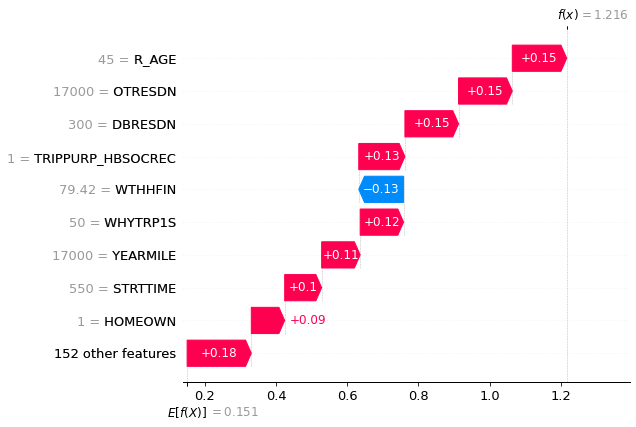

In [207]:
model1 = xgb.XGBRegressor().fit(X_scale,Y)
imp_vals = model1.get_booster().get_fscore()
explainer = shap.Explainer(model1)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])


In [67]:
X['PUBTRANS']

KeyError: 'PUBTRANS'

In [119]:
shap_values.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [116]:
shap.force_plot(explainer_shap.expected_value, shap_values[5,:], X_test[5,:],plot_cmap="DrDb")

TypeError: tuple indices must be integers or slices, not tuple

In [110]:
shap_values

([array([[-1.70997638e-04,  2.46748211e-04, -2.85994934e-05, ...,
           8.70449387e-06,  5.04720072e-05,  1.65764957e-04],
         [-4.43137767e-05,  1.13636283e-04, -3.00795393e-05, ...,
           2.24184287e-04,  3.85980751e-04,  1.99029880e-04],
         [-8.74461773e-05,  1.13995855e-04, -2.80682607e-05, ...,
           7.80572184e-07,  3.15163540e-04,  2.71735980e-04],
         ...,
         [-1.42179593e-04,  1.66777338e-04, -1.57055757e-05, ...,
           3.46807545e-05,  2.56487097e-04,  1.90423088e-04],
         [-2.39410179e-04,  4.74769805e-04, -4.65622840e-06, ...,
           1.34655679e-04,  3.42241075e-04,  2.23684980e-04],
         [-9.99641448e-05,  2.47398145e-04,  1.66546526e-05, ...,
           1.65949662e-05,  2.36541572e-04,  2.16101826e-04]])],
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
       

In [96]:
#explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=list(X.columns), class_names=list(Y_train), mode='classification')
exp = explainer.explain_instance(X_test, model.predict, num_features=91,top_labels=1)


ValueError: could not broadcast input array from shape (17968,91) into shape (17968)

In [323]:
exp.show_in_notebook(show_table=True)


TypeError: Object of type ndarray is not JSON serializable

In [86]:
exp.as_list( )

[('0.67 < [6.78253497e-01 6.79101314e-01 1.10110110e-02 1.28205128e-02\n 2.50000000e-01 8.23529412e-02 3.88888889e-01 2.58899676e-02\n 6.66666667e-01 4.23280423e-02 2.04081633e-02 9.43396226e-02\n 1.00000000e+00 0.00000000e+00 6.66666667e-01 2.50000000e-01\n 0.00000000e+00 1.28205128e-02 6.66666667e-01 1.00000000e+00\n 6.56525220e-02 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.10416667e-01 0.00000000e+00 1.00000000e+00 6.66666667e-01\n 6.66666667e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 9.45932169e-01 2.45283019e-01\n 0.00000000e+00 7.69230769e-02 3.00000000e-01 1.66666667e-01\n 9.50000000e-01 2.85714286e-01 0.00000000e+00 1.11111111e-01\n 2.85714286e-01 8.00000000e-02 0.00000000e+00 5.55555556e-01\n 1.00000000e+00 1.00000000e+00 1.00000000e+00 3.33333333e-01\n 1.00000000e+00 0.00000000e+00 3.85444744e-01 2.50000000e-01\n 0.00000000e+00 2.68292683e-01 8.57142857e-02 1.00000000e+00

In [68]:
query_instances=X_train
imp = m.global_feature_importance(query_instances)
print(m.summary_importance)


AttributeError: 'KerasTensorFlowModel' object has no attribute 'global_feature_importance'

In [23]:
modes_AZ=modes[modes['HHSTATE']=='CA']
modes_AZ=modes_AZ[modes_AZ['TRPTRANS']!=97]

In [22]:
modes_AZ=modes_AZ.drop(['HOUSEID','HHSTATE','PERSONID','TDTRPNUM','VEHID','VEHTYPE'], axis=1)
modes_AZ

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
42,800,945,105,68.406,3,0,0,-1,-1,-1,...,40,300,300,60,17000,7000,5000,40,7000,3000
43,1800,2000,120,73.720,3,0,0,-1,-1,-1,...,40,7000,3000,40,300,50,25,40,300,300
44,700,715,15,0.688,1,0,0,-1,-1,-1,...,40,300,300,40,300,50,25,40,300,300
45,800,815,15,0.688,1,0,0,-1,-1,-1,...,40,300,300,40,300,50,25,40,300,300
46,900,1100,120,77.937,3,0,0,-1,-1,-1,...,40,300,300,40,7000,7000,5000,50,7000,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,1155,1200,5,2.095,3,0,0,-1,-1,-1,...,50,1500,750,5,50,50,25,5,750,300
923504,1500,1510,10,6.176,3,0,0,-1,-1,-1,...,5,750,300,40,1500,750,350,20,750,300
923505,1615,1625,10,5.958,3,0,0,-1,-1,-1,...,20,750,300,5,50,50,25,5,750,300
923550,1330,1340,10,1.613,3,0,0,-1,-1,-1,...,20,750,300,40,7000,3000,3000,50,7000,3000


In [23]:
Y=modes_AZ['TRPTRANS']
X=modes_AZ.drop(['TRPTRANS'], axis=1)
cols_to_remove = []
for col in X.columns:
    try:
        _ = X[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass
    
X = X[[col for col in X.columns if col not in cols_to_remove]]
X

Couldn't covert TRIPPURP to float
Couldn't covert HH_CBSA to float
Couldn't covert OBHUR to float
Couldn't covert DBHUR to float


,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
42,800,945,105,68.406,0,0,-1,-1,-1,-1,...,40,300,300,60,17000,7000,5000,40,7000,3000
43,1800,2000,120,73.720,0,0,-1,-1,-1,-1,...,40,7000,3000,40,300,50,25,40,300,300
44,700,715,15,0.688,0,0,-1,-1,-1,-1,...,40,300,300,40,300,50,25,40,300,300
45,800,815,15,0.688,0,0,-1,-1,-1,-1,...,40,300,300,40,300,50,25,40,300,300
46,900,1100,120,77.937,0,0,-1,-1,-1,-1,...,40,300,300,40,7000,7000,5000,50,7000,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,1155,1200,5,2.095,0,0,-1,-1,-1,-1,...,50,1500,750,5,50,50,25,5,750,300
923504,1500,1510,10,6.176,0,0,-1,-1,-1,-1,...,5,750,300,40,1500,750,350,20,750,300
923505,1615,1625,10,5.958,0,0,-1,-1,-1,-1,...,20,750,300,5,50,50,25,5,750,300
923550,1330,1340,10,1.613,0,0,-1,-1,-1,-1,...,20,750,300,40,7000,3000,3000,50,7000,3000


In [24]:
X=X.dropna()
X = X.astype(float)
X

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
42,800.0,945.0,105.0,68.406,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,60.0,17000.0,7000.0,5000.0,40.0,7000.0,3000.0
43,1800.0,2000.0,120.0,73.720,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,7000.0,3000.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
44,700.0,715.0,15.0,0.688,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
45,800.0,815.0,15.0,0.688,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
46,900.0,1100.0,120.0,77.937,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,7000.0,7000.0,5000.0,50.0,7000.0,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,1155.0,1200.0,5.0,2.095,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,50.0,1500.0,750.0,5.0,50.0,50.0,25.0,5.0,750.0,300.0
923504,1500.0,1510.0,10.0,6.176,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,5.0,750.0,300.0,40.0,1500.0,750.0,350.0,20.0,750.0,300.0
923505,1615.0,1625.0,10.0,5.958,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,5.0,50.0,50.0,25.0,5.0,750.0,300.0
923550,1330.0,1340.0,10.0,1.613,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,40.0,7000.0,3000.0,3000.0,50.0,7000.0,3000.0


In [25]:
X_scale = min_max_scaler.fit_transform(X)
X

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
42,800.0,945.0,105.0,68.406,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,60.0,17000.0,7000.0,5000.0,40.0,7000.0,3000.0
43,1800.0,2000.0,120.0,73.720,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,7000.0,3000.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
44,700.0,715.0,15.0,0.688,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
45,800.0,815.0,15.0,0.688,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
46,900.0,1100.0,120.0,77.937,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,7000.0,7000.0,5000.0,50.0,7000.0,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,1155.0,1200.0,5.0,2.095,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,50.0,1500.0,750.0,5.0,50.0,50.0,25.0,5.0,750.0,300.0
923504,1500.0,1510.0,10.0,6.176,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,5.0,750.0,300.0,40.0,1500.0,750.0,350.0,20.0,750.0,300.0
923505,1615.0,1625.0,10.0,5.958,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,5.0,50.0,50.0,25.0,5.0,750.0,300.0
923550,1330.0,1340.0,10.0,1.613,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,40.0,7000.0,3000.0,3000.0,50.0,7000.0,3000.0


In [26]:
Y=pd.get_dummies(Y)
Y

,-9,-8,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
42,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923504,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923505,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923550,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
model.evaluate(X_scale, Y)

615/615 [==============================] - 1s 1ms/step - loss: 16.6116 - accuracy: 0.3723


[16.61160659790039, 0.37231552600860596]

In [36]:
Y=modes_full['TRPTRANS']
X=modes_full.drop(['TRPTRANS'], axis=1)
cols_to_remove = []
for col in X.columns:
    try:
        _ = X[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass
    
X = X[[col for col in X.columns if col not in cols_to_remove]]
X

Couldn't covert TRIPPURP to float
Couldn't covert HH_CBSA to float
Couldn't covert OBHUR to float
Couldn't covert DBHUR to float


,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,1000,1015,15,5.244,0,0,-1,-1,-1,-1,...,20,750,300,50,750,300,350,30,300,300
1,1510,1530,20,5.149,0,0,-1,-1,-1,-1,...,30,300,300,50,1500,750,750,20,750,300
2,700,900,120,84.004,0,0,-1,-1,-1,-1,...,40,1500,750,50,1500,750,750,20,750,300
3,1800,2030,150,81.628,0,0,-1,-1,-1,-1,...,20,750,300,40,1500,750,750,40,1500,750
4,845,900,15,2.250,0,0,-1,-1,-1,-1,...,20,750,300,50,750,300,350,60,750,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923567,810,837,27,1.168,0,0,-1,-1,-1,-1,...,70,30000,17000,70,7000,7000,5000,80,17000,17000
923568,1320,1328,8,0.238,0,0,-1,-1,-1,-1,...,80,17000,17000,70,7000,7000,5000,60,3000,3000
923569,1415,1420,5,0.238,0,0,-1,-1,-1,-1,...,60,3000,3000,70,7000,7000,5000,80,17000,17000
923570,1820,1845,25,0.867,0,0,-1,-1,-1,-1,...,80,17000,17000,60,30000,30000,5000,70,30000,30000


In [48]:
X=X.dropna()
X = X.astype(float)
X

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,1000.0,1015.0,15.0,5.244,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,50.0,750.0,300.0,350.0,30.0,300.0,300.0
1,1510.0,1530.0,20.0,5.149,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,30.0,300.0,300.0,50.0,1500.0,750.0,750.0,20.0,750.0,300.0
2,700.0,900.0,120.0,84.004,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,1500.0,750.0,50.0,1500.0,750.0,750.0,20.0,750.0,300.0
3,1800.0,2030.0,150.0,81.628,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,40.0,1500.0,750.0,750.0,40.0,1500.0,750.0
4,845.0,900.0,15.0,2.250,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,50.0,750.0,300.0,350.0,60.0,750.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923567,810.0,837.0,27.0,1.168,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,70.0,30000.0,17000.0,70.0,7000.0,7000.0,5000.0,80.0,17000.0,17000.0
923568,1320.0,1328.0,8.0,0.238,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,80.0,17000.0,17000.0,70.0,7000.0,7000.0,5000.0,60.0,3000.0,3000.0
923569,1415.0,1420.0,5.0,0.238,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,60.0,3000.0,3000.0,70.0,7000.0,7000.0,5000.0,80.0,17000.0,17000.0
923570,1820.0,1845.0,25.0,0.867,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,80.0,17000.0,17000.0,60.0,30000.0,30000.0,5000.0,70.0,30000.0,30000.0


In [49]:
X_scale = min_max_scaler.fit_transform(X)
X

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,1000.0,1015.0,15.0,5.244,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,50.0,750.0,300.0,350.0,30.0,300.0,300.0
1,1510.0,1530.0,20.0,5.149,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,30.0,300.0,300.0,50.0,1500.0,750.0,750.0,20.0,750.0,300.0
2,700.0,900.0,120.0,84.004,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,1500.0,750.0,50.0,1500.0,750.0,750.0,20.0,750.0,300.0
3,1800.0,2030.0,150.0,81.628,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,40.0,1500.0,750.0,750.0,40.0,1500.0,750.0
4,845.0,900.0,15.0,2.250,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,50.0,750.0,300.0,350.0,60.0,750.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923567,810.0,837.0,27.0,1.168,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,70.0,30000.0,17000.0,70.0,7000.0,7000.0,5000.0,80.0,17000.0,17000.0
923568,1320.0,1328.0,8.0,0.238,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,80.0,17000.0,17000.0,70.0,7000.0,7000.0,5000.0,60.0,3000.0,3000.0
923569,1415.0,1420.0,5.0,0.238,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,60.0,3000.0,3000.0,70.0,7000.0,7000.0,5000.0,80.0,17000.0,17000.0
923570,1820.0,1845.0,25.0,0.867,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,80.0,17000.0,17000.0,60.0,30000.0,30000.0,5000.0,70.0,30000.0,30000.0


In [50]:
Y=pd.get_dummies(Y)
Y

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923568,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923569,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923570,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3,random_state=42) 


In [52]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=42)


In [53]:
model.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=100,batch_size=32)

Epoch 1/100
20126/20126 [==============================] - 91s 5ms/step - loss: 1.0120 - accuracy: 0.5717 - val_loss: 0.9800 - val_accuracy: 0.5896
Epoch 2/100
20126/20126 [==============================] - 99s 5ms/step - loss: 0.9738 - accuracy: 0.5873 - val_loss: 0.9406 - val_accuracy: 0.6051
Epoch 3/100
20126/20126 [==============================] - 100s 5ms/step - loss: 0.9537 - accuracy: 0.5960 - val_loss: 0.9217 - val_accuracy: 0.6122
Epoch 4/100
20126/20126 [==============================] - 97s 5ms/step - loss: 0.9347 - accuracy: 0.6053 - val_loss: 0.9581 - val_accuracy: 0.6177
Epoch 5/100
20126/20126 [==============================] - 96s 5ms/step - loss: 0.9195 - accuracy: 0.6118 - val_loss: 1.0062 - val_accuracy: 0.6280
Epoch 6/100
20126/20126 [==============================] - 91s 4ms/step - loss: 0.9060 - accuracy: 0.6175 - val_loss: 0.9129 - val_accuracy: 0.6338
Epoch 7/100
20126/20126 [==============================] - 89s 4ms/step - loss: 0.8931 - accuracy: 0.6247 - val

20126/20126 [==============================] - 86s 4ms/step - loss: 0.6568 - accuracy: 0.7323 - val_loss: 0.7793 - val_accuracy: 0.7632
Epoch 57/100
20126/20126 [==============================] - 86s 4ms/step - loss: 0.6546 - accuracy: 0.7330 - val_loss: 1.1804 - val_accuracy: 0.7675
Epoch 58/100
20126/20126 [==============================] - 85s 4ms/step - loss: 0.6545 - accuracy: 0.7333 - val_loss: 1.4066 - val_accuracy: 0.7703
Epoch 59/100
20126/20126 [==============================] - 86s 4ms/step - loss: 0.6518 - accuracy: 0.7342 - val_loss: 1.1159 - val_accuracy: 0.7687
Epoch 60/100
20126/20126 [==============================] - 85s 4ms/step - loss: 0.6490 - accuracy: 0.7353 - val_loss: 1.4753 - val_accuracy: 0.7662
Epoch 61/100
20126/20126 [==============================] - 85s 4ms/step - loss: 0.6464 - accuracy: 0.7369 - val_loss: 0.9567 - val_accuracy: 0.7700
Epoch 62/100
20126/20126 [==============================] - 86s 4ms/step - loss: 0.6460 - accuracy: 0.7373 - val_loss: 

In [54]:
model.evaluate(X_test, Y_test)

4313/4313 [==============================] - 4s 876us/step - loss: 4.6660 - accuracy: 0.8013


[4.666034698486328, 0.801285445690155]

In [130]:
modes_AZ=modes.loc[(modes['HHSTATE']=='CA')]
modes_AZ=modes_AZ.loc[(modes_AZ['TRPTRANS']!=97)&(modes_AZ['TRPTRANS']!=-9)&(modes_AZ['TRPTRANS']!=-8)&(modes_AZ['TRPTRANS']!=-7)]
modes_AZ=modes_AZ.drop(['HOUSEID','HHSTATE','PERSONID','TDTRPNUM','VEHID','VEHTYPE','TRACC_WLK','TRACC_POV','TRACC_BUS','TRACC_CRL','TRACC_SUB','TRACC_OTH','TREGR_WLK','TREGR_BUS','TREGR_POV','TREGR_CRL','TREGR_SUB','TREGR_OTH'], axis=1)

In [131]:
Y=modes_AZ['TRPTRANS']
X=modes_AZ.drop(['TRPTRANS'], axis=1)
cols_to_remove = []
for col in X.columns:
    try:
        _ = X[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass
    
X = X[[col for col in X.columns if col not in cols_to_remove]]
X

Couldn't covert TRIPPURP to float
Couldn't covert HH_CBSA to float
Couldn't covert OBHUR to float
Couldn't covert DBHUR to float


,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
42,800,945,105,68.406,0,0,-1,-1,-1,-1,...,40,300,300,60,17000,7000,5000,40,7000,3000
43,1800,2000,120,73.720,0,0,-1,-1,-1,-1,...,40,7000,3000,40,300,50,25,40,300,300
44,700,715,15,0.688,0,0,-1,-1,-1,-1,...,40,300,300,40,300,50,25,40,300,300
45,800,815,15,0.688,0,0,-1,-1,-1,-1,...,40,300,300,40,300,50,25,40,300,300
46,900,1100,120,77.937,0,0,-1,-1,-1,-1,...,40,300,300,40,7000,7000,5000,50,7000,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,1155,1200,5,2.095,0,0,-1,-1,-1,-1,...,50,1500,750,5,50,50,25,5,750,300
923504,1500,1510,10,6.176,0,0,-1,-1,-1,-1,...,5,750,300,40,1500,750,350,20,750,300
923505,1615,1625,10,5.958,0,0,-1,-1,-1,-1,...,20,750,300,5,50,50,25,5,750,300
923550,1330,1340,10,1.613,0,0,-1,-1,-1,-1,...,20,750,300,40,7000,3000,3000,50,7000,3000


In [132]:
X=X.dropna()
X = X.astype(float)
X

,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPACCMP,TRPHHACC,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
42,800.0,945.0,105.0,68.406,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,60.0,17000.0,7000.0,5000.0,40.0,7000.0,3000.0
43,1800.0,2000.0,120.0,73.720,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,7000.0,3000.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
44,700.0,715.0,15.0,0.688,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
45,800.0,815.0,15.0,0.688,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,300.0,50.0,25.0,40.0,300.0,300.0
46,900.0,1100.0,120.0,77.937,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,40.0,300.0,300.0,40.0,7000.0,7000.0,5000.0,50.0,7000.0,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,1155.0,1200.0,5.0,2.095,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,50.0,1500.0,750.0,5.0,50.0,50.0,25.0,5.0,750.0,300.0
923504,1500.0,1510.0,10.0,6.176,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,5.0,750.0,300.0,40.0,1500.0,750.0,350.0,20.0,750.0,300.0
923505,1615.0,1625.0,10.0,5.958,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,5.0,50.0,50.0,25.0,5.0,750.0,300.0
923550,1330.0,1340.0,10.0,1.613,0.0,0.0,-1.0,-1.0,-1.0,-1.0,...,20.0,750.0,300.0,40.0,7000.0,3000.0,3000.0,50.0,7000.0,3000.0


In [133]:
Y=pd.get_dummies(Y)
Y

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
42,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923504,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923505,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923550,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.33912675, 0.40059347, 0.12140575, ..., 0.47115385, 0.23356326,
        0.10026992],
       [0.76303518, 0.84781687, 0.13738019, ..., 0.47115385, 0.01029691,
        0.01029691],
       [0.29673591, 0.30309453, 0.02555911, ..., 0.47115385, 0.01029691,
        0.01029691],
       ...,
       [0.68461212, 0.68885121, 0.02023429, ..., 0.13461538, 0.02529241,
        0.01029691],
       [0.56379822, 0.5680373 , 0.02023429, ..., 0.56730769, 0.23356326,
        0.10026992],
       [0.57439593, 0.59559135, 0.02023429, ..., 0.27884615, 0.02529241,
        0.01029691]])

In [136]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3,random_state=42) 
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=42)

In [30]:
model.fit(X_scale, Y)

5783/5783 [==============================] - 22s 4ms/step - loss: 0.9953 - accuracy: 0.6092


In [137]:
model.fit(X_train, Y_train,validation_data=(X_val, Y_val), epochs=150)

Epoch 1/150
4048/4048 [==============================] - 17s 4ms/step - loss: 1.0265 - accuracy: 0.6027 - val_loss: 1.1100 - val_accuracy: 0.6139
Epoch 2/150
4048/4048 [==============================] - 19s 5ms/step - loss: 0.9380 - accuracy: 0.6208 - val_loss: 0.9100 - val_accuracy: 0.6333
Epoch 3/150
4048/4048 [==============================] - 18s 4ms/step - loss: 0.8878 - accuracy: 0.6404 - val_loss: 0.8619 - val_accuracy: 0.6564
Epoch 4/150
4048/4048 [==============================] - 17s 4ms/step - loss: 0.8379 - accuracy: 0.6628 - val_loss: 0.9214 - val_accuracy: 0.6837
Epoch 5/150
4048/4048 [==============================] - 20s 5ms/step - loss: 0.7949 - accuracy: 0.6803 - val_loss: 0.8401 - val_accuracy: 0.6959
Epoch 6/150
4048/4048 [==============================] - 18s 4ms/step - loss: 0.7585 - accuracy: 0.6973 - val_loss: 0.7950 - val_accuracy: 0.7107
Epoch 7/150
4048/4048 [==============================] - 17s 4ms/step - loss: 0.7248 - accuracy: 0.7099 - val_loss: 0.6879 -

KeyboardInterrupt: 

In [62]:
model.evaluate(X_test,Y_test)

562/562 [==============================] - 0s 866us/step - loss: 0.3631 - accuracy: 0.8948


[0.36306989192962646, 0.8947573304176331]

In [135]:
model.evaluate(X_scale,Y)

5783/5783 [==============================] - 5s 873us/step - loss: 2.9518 - accuracy: 0.4823


[2.9517829418182373, 0.48226964473724365]

In [84]:
person=pd.read_csv('perpub.csv', error_bad_lines=False) #Using Bikes data from Bay Area for the month of Feb 2021
person

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,1,67,3,2,1,2,2,6,2,...,2,206.690153,T,50,1500,750,750,20,750,300
1,30000007,2,66,3,2,2,1,2,1,-1,...,2,197.075742,T,50,1500,750,750,20,750,300
2,30000007,3,28,2,2,3,2,2,5,2,...,2,219.514210,T,50,1500,750,750,20,750,300
3,30000008,1,55,5,2,1,1,1,1,-1,...,2,63.185911,R,5,300,300,150,5,300,300
4,30000008,2,49,4,2,2,2,1,1,-1,...,2,58.665911,R,5,300,300,150,5,300,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264229,40794301,4,18,2,2,3,2,1,97,2,...,2,213.514657,R,20,50,50,25,20,300,50
264230,40794301,5,14,1,2,3,2,1,-1,-1,...,2,133.448420,R,20,50,50,25,20,300,50
264231,40794301,6,12,-1,2,3,2,1,-1,-1,...,2,133.448420,R,20,50,50,25,20,300,50
264232,40794301,7,8,-1,2,3,2,1,-1,-1,...,2,133.448420,R,20,50,50,25,20,300,50


In [95]:
person[person['BIKE_DFR']==7]

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
348,30001545,1,52,4,2,1,2,1,1,-1,...,2,285.920219,T,20,300,300,75,5,1500,1500
423,30001860,1,61,2,2,1,2,1,4,2,...,2,56.728973,R,5,300,50,75,5,300,50
634,30002863,1,30,3,2,1,2,1,1,-1,...,2,924.575363,T,20,750,300,350,30,1500,300
1674,30007052,2,52,1,2,2,1,1,1,-1,...,2,141.930739,R,5,300,50,75,5,300,50
2171,30008876,2,38,5,2,2,2,1,1,-1,...,1,135.577714,U,70,17000,7000,5000,60,17000,17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261850,40777663,1,59,4,2,1,2,1,1,-1,...,2,140.628890,R,30,300,50,75,20,300,50
262049,40778937,1,28,2,2,1,1,1,1,-1,...,2,88.635573,R,5,50,50,25,5,50,50
262091,40779144,1,65,3,2,1,2,1,6,2,...,2,347.136778,R,5,50,50,25,5,50,50
263432,40788806,1,66,5,2,1,1,1,3,2,...,2,69.893339,S,20,3000,750,1500,20,3000,750
